In [8]:
import glob
import natsort
general_path = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/'
ob1_files = glob.glob(general_path+'./LabelDataObstetrics1/*.mat')
ob1_files = natsort.natsorted(ob1_files)
print(len(ob1_files))
#split ob1_files.split('/')
patient_t=[]
sweep_t=[]
for i in range(len(ob1_files)):
    ob1_files[i]=ob1_files[i].split('/')[-1].split('.')[0]
    patient=ob1_files[i].split('_')[0]
    sweep=ob1_files[i].split('sweep')[1]
    #if sweep[0] is not a number, use sweep[1]
    sweep = sweep[1] if not sweep[0].isdigit() else sweep[0]
    patient_t.append(patient)
    sweep_t.append(sweep)
print(ob1_files)
print(patient_t)
print(sweep_t)
print(len(sweep_t))

140
['001_sweep1', '001_sweep2', '001_sweep3', '001_sweep4', '001_sweep5', '002_sweep1', '002_sweep2', '002_sweep3', '002_sweep5', '002_sweep6', '003_sweep1', '003_sweep2', '003_sweep3', '003_sweep4', '004_sweep1', '004_sweep2', '004_sweep4', '004_sweep5', '004_sweep6', '004_sweep7', '004_sweep8', '005_sweep1', '005_sweep2', '005_sweep3', '005_sweep4', '005_sweep5', '005_sweep6', '006_sweep1', '006_sweep4', '006_sweep5', '006_sweep6', '006_sweep7', '007_sweep1', '007_sweep2', '007_sweep3', '007_sweep4', '007_sweep6', '007_sweep7', '007_sweep8', '008_sweep1', '008_sweep2', '008_sweep3', '008_sweep6', '008_sweep7', '008_sweep8', '009_sweep1', '009_sweep2', '009_sweep3', '009_sweep4', '009_sweep5', '009_sweep6', '009_sweep7', '010_sweep1', '010_sweep2', '010_sweep3', '010_sweep4', '010_sweep6', '011_sweep1 (1)', '011_sweep1', '011_sweep2 (1)', '011_sweep2', '011_sweep3 (1)', '011_sweep3', '011_sweep4 (1)', '011_sweep4', '011_sweep5 (1)', '011_sweep5', '011_sweep6 (1)', '011_sweep6', '012_

In [81]:
import glob
import natsort
general_path = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/'
ob1_files = glob.glob(general_path+'./LabelDataObstetrics1/*.mat')
print(len(ob1_files))
ob1_files = natsort.natsorted(ob1_files)
#split ob1_files.split('/')
patient_t=[]
sweep_t=[]
for i in range(len(ob1_files)):
    sweep_t.append(ob1_files[i].split('/')[-1].split('.')[0])
    #check if ob1_files[i] has word copy, if so remove it
    if 'copy' in sweep_t[i]:
        sweep_t[i]=sweep_t[i].split(' copy')[0]
    patient=sweep_t[i][0:3]
    #if patient has letter _ in it, remove it and add a 0 start
    patient = '0'+patient if '_' in patient else patient
    patient=patient.split('_')[0]
    patient_t.append(patient)
print(ob1_files)
print(patient_t)
print(sweep_t)
print(len(sweep_t))

140
['/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/001_sweep1.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/001_sweep2.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/001_sweep3.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/001_sweep4.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/001_sweep5.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/002_sweep1.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/002_sweep2.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/002_sweep3.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/002_sweep5.mat', '/Use

In [42]:
import cv2
import numpy as np
import scipy.io as sio
import skvideo.io as skv
import torchio as tio
from matplotlib import colors as mcolors
from skimage.transform import resize
import os
import sys
import matplotlib.pyplot as plt
import skimage.morphology as morph

# Define a custom colormap
cmap = mcolors.ListedColormap(['black', 'red', 'green', 'blue', 'yellow', 'magenta'])
bounds = np.arange(7)  # Bins for 0-5 labels
norm = mcolors.BoundaryNorm(bounds, cmap.N)

src_path = os.path.join(general_path, 'src')
sys.path.append(src_path)

#import overlay_video from src/utils/overlay_video.py assuming that the file is in the same directory
from utils.overlay_video import generate_overlay_video

#for i in range(60,len(ob1_files)):

# Variables de conteo
single_mask_frames = 0  # Frames con una sola clase además del fondo
multi_mask_frames = 0   # Frames con múltiples clases
class_counts = {i: 0 for i in range(6)}  # Para contar la presencia de cada clase (0-5)

#for i in range(61, 63):  # Puedes extender el rango hasta 69
for i in range(0,len(ob1_files)):
    ob = sio.loadmat(ob1_files[i])['labels']
    ob = np.moveaxis(ob, 2, 0)

    # Filtrar solo los frames que no están vacíos
    non_empty_frames = np.where(np.sum(ob, axis=(1, 2)) > 0)[0]
    ob = ob[non_empty_frames]

    for frame in ob:
        unique_classes = np.unique(frame)  # Clases presentes en el frame

        # Remover el fondo (0) de la cuenta
        unique_classes = unique_classes[unique_classes > 0]

        # Contar presencia de cada clase
        for label in unique_classes:
            class_counts[label] += 1

        # Clasificar el frame
        if len(unique_classes) == 1:
            single_mask_frames += 1
        elif len(unique_classes) > 1:
            multi_mask_frames += 1

# Mostrar estadísticas
total_frames = single_mask_frames + multi_mask_frames
print(f"Total de frames analizados: {total_frames}")
print(f"Frames con una sola máscara (excluyendo fondo): {single_mask_frames} ({(single_mask_frames / total_frames) * 100:.2f}%)")
print(f"Frames con múltiples máscaras: {multi_mask_frames} ({(multi_mask_frames / total_frames) * 100:.2f}%)")
print("Frecuencia de aparición de cada clase (excluyendo fondo):")
for label, count in class_counts.items():
    if label > 0:  # Excluir el fondo
        print(f"Clase {label}: {count} frames")

    # count+=1
    # print(np.unique(ob))
    # if count==1:
    #     ob_prev = ob.copy()
    # if count==2:
    #     for i in range(117,241):
    #         plt.figure()
    #         plt.subplot(121)
    #         plt.imshow(ob_prev[i], cmap=cmap, norm=norm)
    #         plt.colorbar(ticks=np.arange(6),label='Labels')
    #         plt.title(np.unique(ob_prev[i]))

    #         plt.subplot(122)
    #         plt.imshow(ob[i], cmap=cmap, norm=norm)
    #         plt.colorbar(ticks=np.arange(6),label='Labels')
    #         plt.title(np.unique(ob[i]))
        # print(mp4_file_path)
        # print(ob1_files[i])
        # print(np.unique(ob))

        # #print id non empty frames of ob
        # print(np.where(np.sum(ob,axis=(1,2))>0))

        # #plot first frame of ob non empty with colors based on the labels, 0 is black, 1 is red, 2 is green, 3 is blue, 4 is yellow and 5 is magenta
        # plt.subplot(4,2,i-60)
        # plt.imshow(ob[np.where(np.sum(ob,axis=(1,2))>0)[0][0]], cmap=cmap, norm=norm)
        # #plt.colorbar(ticks=np.arange(6),label='Labels')
        


Total de frames analizados: 8434
Frames con una sola máscara (excluyendo fondo): 7269 (86.19%)
Frames con múltiples máscaras: 1165 (13.81%)
Frecuencia de aparición de cada clase (excluyendo fondo):
Clase 1: 700 frames
Clase 2: 2965 frames
Clase 3: 913 frames
Clase 4: 658 frames
Clase 5: 4542 frames


In [94]:
import cv2
import numpy as np
import scipy.io as sio
import skvideo.io as skv
import torchio as tio
from skimage.transform import resize
import os
import sys
import matplotlib.pyplot as plt
import skimage.morphology as morph

src_path = os.path.join(general_path, 'src')
sys.path.append(src_path)

#import overlay_video from src/utils/overlay_video.py assuming that the file is in the same directory
from utils.overlay_video import generate_overlay_video


#for i in range(0,len(ob1_files)):
for i in range(105,len(ob1_files)): #falta del 56 al 68, del 81 al 89
# for i in range(2,3):
    mp4_file_path = general_path+'./Study/'+patient_t[i]+'/'+sweep_t[i]+'.mp4'
    coordinates = sio.loadmat(general_path+'./crop_coordinates/'+patient_t[i]+'.mat')
    #substract 1 to coordinates to match python indexing
    x1 = coordinates['x1'][0][0]-1
    x2 = coordinates['x2'][0][0]
    y1 = coordinates['y1'][0][0]-1
    y2 = coordinates['y2'][0][0]

    width = x2-x1
    height = y2-y1

    ob = sio.loadmat(ob1_files[i])['labels']
    ob=np.moveaxis(ob, 2, 0)
    print(mp4_file_path)
    print(ob1_files[i])
    print(np.unique(ob))
    non_empty_frames = np.where(np.any(ob > 0, axis=(1, 2)))[0]
    #if non_empty_frames is empty, remove it pass the loop
    if non_empty_frames.size == 0:
        continue
    cap = cv2.VideoCapture(mp4_file_path)
    #join every frame as an array
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    gt_video = np.array(frames)

    # print(gt_video.shape)
    # print(ob.shape)
    # print('width: ',width)
    # print('height: ',height)
    diff = gt_video[1:,:,:,0]-gt_video[:-1,:,:,0]
    diff_sum=np.sum(diff,axis=(1,2))
    #normalize diff_sum
    diff_sum = diff_sum/np.max(diff_sum)

    # Assuming diff_sum is your normalized data array from the plot
    # Example: diff_sum = np.array([...])  # Replace with your actual array
    threshold = 0.2

    # Detect indices where diff_sum crosses above the threshold
    first_frame = np.where(diff_sum > threshold)[0][0]  # First upward crossing
    last_frame = np.where(diff_sum > threshold)[0][-1]  # Last upward crossing (before drop)

    #if from last_frame to the end is mask ob is not zero, last_frame is the last frame where mask is not zero
    for j in range(last_frame,diff.shape[0]):
        if np.sum(ob[j]) != 0:
            last_frame = j

    #if from start to first_frame is mask ob is not zero, first_frame is the first frame where mask is not zero
    #in this case the for is in reverse
    for j in range(first_frame,0,-1):
        if np.sum(ob[j]) != 0:
            first_frame = j


    # Obtener los límites del área de interés
    # row_limits, col_limits = np.where(morph.remove_small_objects(diff[first_frame+50].astype(bool), min_size=100) > 0)
    # y1, y2 = row_limits.min(), row_limits.max()
    # x1, x2 = col_limits.min(), col_limits.max()

    #check first if ob shape is the same as gt_video

    if ob.shape[1] != gt_video.shape[1] or ob.shape[2] != gt_video.shape[2]:
        #check width with ob.shape[2] and height with ob.shape[1]
        if width != ob.shape[2] or height != ob.shape[1]:
            # print('width and height are not the same')
            # print('width: ',width)
            # print('height: ',height)
            # print('gt: ', gt_video.shape)
            # print('ob: ',ob.shape)
            gt_video = gt_video[first_frame:last_frame, y1:y2, x1:x2, 0]
            ob = ob[first_frame:last_frame, :,:]
            #calculate padding or cropping for height (dim 1)
            pad_or_crop_h = (gt_video.shape[1] - ob.shape[1])
            pad_h_before = max(0, pad_or_crop_h // 2)
            pad_h_after = max(0, pad_or_crop_h - pad_h_before)
            crop_h_before = max(0, -pad_or_crop_h // 2)
            crop_h_after = max(0, -pad_or_crop_h - crop_h_before)

            #calculate padding or cropping for width (dim 2)
            pad_or_crop_w = (gt_video.shape[2] - ob.shape[2])
            pad_w_before = max(0, pad_or_crop_w // 2)
            pad_w_after = max(0, pad_or_crop_w - pad_w_before)
            crop_w_before = max(0, -pad_or_crop_w // 2)
            crop_w_after = max(0, -pad_or_crop_w - crop_w_before)

            #apply padding if needed
            if pad_h_before > 0 or pad_h_after > 0 or pad_w_before > 0 or pad_w_after > 0:
                ob = np.pad(ob, 
                                ((0, 0), 
                                (pad_h_before, pad_h_after), 
                                (pad_w_before, pad_w_after)), 
                                'constant')
                
            #apply cropping if needed
            if crop_h_before > 0 or crop_h_after > 0 or crop_w_before > 0 or crop_w_after > 0:
                ob = ob[:, crop_h_before:ob.shape[1] - crop_h_after, crop_w_before:ob.shape[2] - crop_w_after]
            

        else:
            # Recortar el área de interés
            gt_video = gt_video[first_frame:last_frame, y1:y2, x1:x2, 0]
            ob = ob[first_frame:last_frame, :,:]

    else:
        # Recortar el área de interés
        gt_video = gt_video[first_frame:last_frame, y1:y2, x1:x2, 0]
        ob = ob[first_frame:last_frame, y1:y2,x1:x2]
    non_empty_frames = np.where(np.any(ob > 0, axis=(1, 2)))[0]
    # Identificar rangos
    start_non_empty = non_empty_frames[0]
    end_non_empty = non_empty_frames[-1]

    # Samplear antes, durante y después
    before_frames = np.arange(0, start_non_empty, 14)
    during_frames = np.arange(start_non_empty, end_non_empty + 1, 5)
    after_frames = np.arange(end_non_empty + 1, len(gt_video), 14)

    # Concatenar y asegurar que no se pase del índice máximo
    sampled_frames = np.concatenate([before_frames, during_frames, after_frames])
    sampled_frames = sampled_frames[sampled_frames < len(gt_video)]
    ob_sampled = ob[sampled_frames]
    gt_video_sampled = gt_video[sampled_frames]


    #resize gt_video_sampled to 512x512
    gt_video_sampled=np.array([resize(frame, (512, 512), anti_aliasing=True) for frame in gt_video_sampled])*255
    #resize ob_sampled to 512x512, because it is a mask, use nearest interpolation
    ob_sampled=np.array([resize(frame, (512, 512), anti_aliasing=False, order=0) for frame in ob_sampled])

    print(np.unique(ob_sampled))
    #change dtype to uint8 for gt_video and ob
    #gt_video = gt_video.astype(np.uint8)
    ob_sampled = (ob_sampled/5*255).astype(np.uint8)

   # save gt_video and ob_sampled frame by frame
    for j in range(len(gt_video_sampled)):
       cv2.imwrite(general_path+'data/512x512_marika/gt/'+sweep_t[i]+'_'+str(j)+'.png', gt_video_sampled[j])
       cv2.imwrite(general_path+'data/512x512_marika/label/'+sweep_t[i]+'_'+str(j)+'.png', ob_sampled[j])  
    #np.save(general_path+'data/512x512_maddie/'+sweep_t[i]+'_gt.npy', resized_video_gt)
    #np.save(general_path+'data/512x512_marika/'+sweep_t[i]+'_label.npy', resized_label.astype(np.uint8))
    print(i)

    # # Aplicar el sampling al video
    # gt_video = gt_video[non_empty_frames]
    # ob = ob[non_empty_frames]
    # #show gt_video and ob_sampled
    # plt.figure()
    # plt.subplot(121)
    # plt.imshow(gt_video[0], cmap='gray')
    # plt.title('GT')
    # plt.subplot(122)
    # plt.imshow(gt_video[0], cmap='gray')
    # plt.imshow(ob[0], cmap='jet', alpha=0.1)
    # #break

/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/016/016_sweep7.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/016_sweep7.mat
[0 1 4 5]
[0 1 4 5]
105
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/017/017_sweep1.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/017_sweep1.mat
[0 2 5]
[0 2 5]
106
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/017/017_sweep2.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/017_sweep2.mat
[0 2 5]
[0 2 5]
107
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/017/017_sweep3.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics1/017_sweep3.mat
[0 2]
[0 2]
108
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/017/017_sweep4.mp4
/Users/emili

In [43]:
import glob
import natsort
general_path = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/'
ob1_files = glob.glob(general_path+'./LabelDataObstetrics/*.mat')
print(len(ob1_files))
ob1_files = natsort.natsorted(ob1_files)
#split ob1_files.split('/')
patient_t=[]
sweep_t=[]
for i in range(len(ob1_files)):
    sweep_t.append(ob1_files[i].split('/')[-1].split('.')[0])
    #check if ob1_files[i] has word copy, if so remove it
    if 'copy' in sweep_t[i]:
        sweep_t[i]=sweep_t[i].split(' copy')[0]
    patient=sweep_t[i][0:3]
    #if patient has letter _ in it, remove it and add a 0 start
    patient = '0'+patient if '_' in patient else patient
    patient=patient.split('_')[0]
    patient_t.append(patient)
print(ob1_files)
print(patient_t)
print(sweep_t)
print(len(sweep_t))

117
['/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/002_sweep1 copy.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/002_sweep4 copy.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/002_sweep5 copy.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/007_sweep1 copy 2.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/008_sweep1 copy 2.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/008_sweep7 copy 2.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/010_sweep2 copy 2.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./LabelDataObstetrics/025_sweep4 copy.mat', '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Lab

In [44]:
import cv2
import numpy as np
import scipy.io as sio
import skvideo.io as skv
import torchio as tio
from matplotlib import colors as mcolors
from skimage.transform import resize
import os
import sys
import matplotlib.pyplot as plt
import skimage.morphology as morph

# Define a custom colormap
cmap = mcolors.ListedColormap(['black', 'red', 'green', 'blue', 'yellow', 'magenta'])
bounds = np.arange(7)  # Bins for 0-5 labels
norm = mcolors.BoundaryNorm(bounds, cmap.N)

src_path = os.path.join(general_path, 'src')
sys.path.append(src_path)

#import overlay_video from src/utils/overlay_video.py assuming that the file is in the same directory
from utils.overlay_video import generate_overlay_video

#for i in range(60,len(ob1_files)):

# Variables de conteo
single_mask_frames = 0  # Frames con una sola clase además del fondo
multi_mask_frames = 0   # Frames con múltiples clases
class_counts = {i: 0 for i in range(6)}  # Para contar la presencia de cada clase (0-5)

#for i in range(61, 63):  # Puedes extender el rango hasta 69
for i in range(0,len(ob1_files)):
    ob = sio.loadmat(ob1_files[i])['labels']
    ob = np.moveaxis(ob, 2, 0)

    # Filtrar solo los frames que no están vacíos
    non_empty_frames = np.where(np.sum(ob, axis=(1, 2)) > 0)[0]
    ob = ob[non_empty_frames]

    for frame in ob:
        unique_classes = np.unique(frame)  # Clases presentes en el frame

        # Remover el fondo (0) de la cuenta
        unique_classes = unique_classes[unique_classes > 0]

        # Contar presencia de cada clase
        for label in unique_classes:
            class_counts[label] += 1

        # Clasificar el frame
        if len(unique_classes) == 1:
            single_mask_frames += 1
        elif len(unique_classes) > 1:
            multi_mask_frames += 1

# Mostrar estadísticas
total_frames = single_mask_frames + multi_mask_frames
print(f"Total de frames analizados: {total_frames}")
print(f"Frames con una sola máscara (excluyendo fondo): {single_mask_frames} ({(single_mask_frames / total_frames) * 100:.2f}%)")
print(f"Frames con múltiples máscaras: {multi_mask_frames} ({(multi_mask_frames / total_frames) * 100:.2f}%)")
print("Frecuencia de aparición de cada clase (excluyendo fondo):")
for label, count in class_counts.items():
    if label > 0:  # Excluir el fondo
        print(f"Clase {label}: {count} frames")


Total de frames analizados: 5087
Frames con una sola máscara (excluyendo fondo): 5087 (100.00%)
Frames con múltiples máscaras: 0 (0.00%)
Frecuencia de aparición de cada clase (excluyendo fondo):
Clase 1: 5087 frames
Clase 2: 0 frames
Clase 3: 0 frames
Clase 4: 0 frames
Clase 5: 0 frames


range mask1:  184 186
range mask2:  287 432
range mask1:  180 328
range mask2:  240 283
range mask1:  171 200
range mask2:  168 195


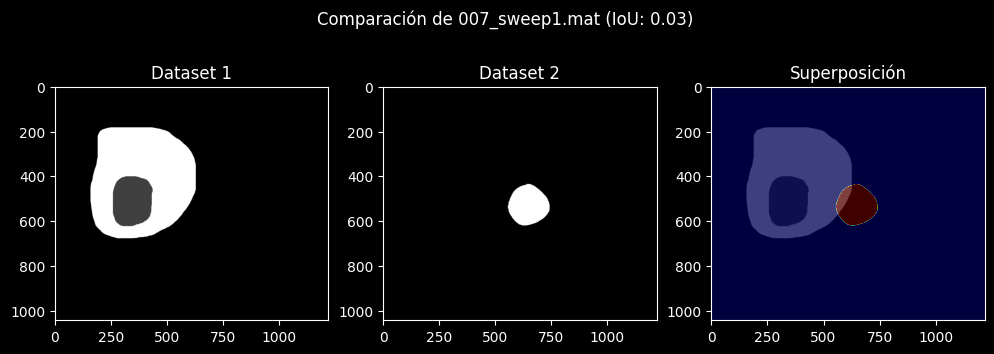

range mask1:  222 515
range mask2:  262 391
range mask1:  127 471
range mask2:  350 552
range mask1:  128 216
range mask2:  161 182


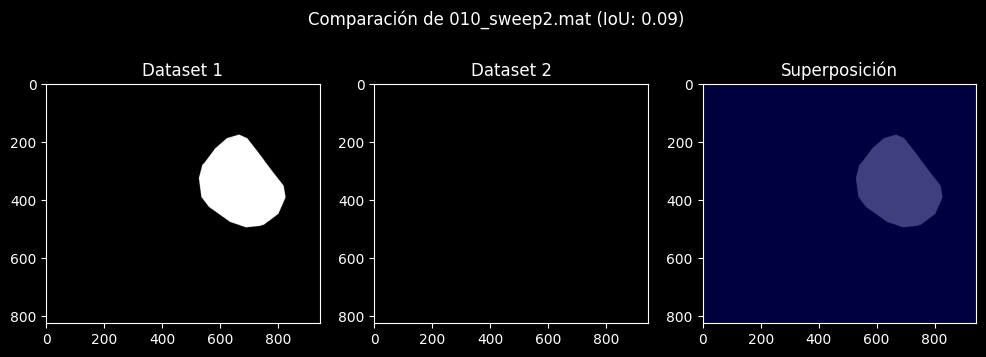


Total de archivos comparados: 6
Promedio de IoU entre segmentaciones después del recorte y padding: 0.05


In [ ]:

import scipy.io as sio
import numpy as np
import os
import matplotlib.pyplot as plt
import re  # Para limpiar los nombres de los archivos

# 📂 Rutas de los datasets
path1 = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/LabelDataObstetrics1"  # Cambia esto con la ruta real de LabelDataObstetrics1
path2 = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/LabelDataObstetrics"  # Cambia esto con la ruta real de LabelDataObstetrics
crop_path = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/crop_coordinates"  # Ruta con los archivos de coordenadas

# 📄 Obtener lista de archivos en ambos datasets
files1 = {f: os.path.join(path1, f) for f in os.listdir(path1) if f.endswith(".mat")}
files2 = {f: os.path.join(path2, f) for f in os.listdir(path2) if f.endswith(".mat")}

# 🔍 Normalizar nombres para emparejar archivos (removiendo " copy" y " copy 2")
import re
def clean_filename(filename):
    return re.sub(r" copy( 2)?", "", filename)  # Remueve " copy" y " copy 2"

normalized_files2 = {clean_filename(f): os.path.join(path2, f) for f in files2.keys()}

# 🔍 Encontrar archivos comunes basados en nombres normalizados
common_files = set(files1.keys()).intersection(set(normalized_files2.keys()))

# Función para calcular IoU entre dos máscaras
def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    return intersection / union if union > 0 else 1.0  # 1.0 si ambas están vacías

# 📊 Comparar etiquetas de archivos comunes después del recorte y padding
ious = []

for filename in common_files:
    # Cargar las segmentaciones desde los archivos .mat
    data1 = sio.loadmat(files1[filename])
    data2 = sio.loadmat(normalized_files2[filename])

    mask1 = data1["labels"]  # Ajusta la clave si es diferente
    mask2 = data2["labels"]

    # Cargar coordenadas de recorte
    patient_id = filename.split("_")[0]  # Extraer ID del paciente
    crop_file = os.path.join(crop_path, f"{patient_id}.mat")

    if not os.path.exists(crop_file):
        print(f"⚠️ No se encontró recorte para {filename}, se omite.")
        continue

    crop_data = sio.loadmat(crop_file)
    x1, x2 = crop_data["x1"][0][0] - 1, crop_data["x2"][0][0]
    y1, y2 = crop_data["y1"][0][0] - 1, crop_data["y2"][0][0]

    # Recortar las máscaras
    mask1 = mask1[y1:y2, x1:x2,]
    mask2 = mask2[y1:y2, x1:x2,]

    #crop frames time
    if mask1.shape[2] != mask2.shape[2]:
        mask1 = mask1[:,:,0:mask2.shape[2]]


    # 🔹 Aplicar Padding si hay diferencias en tamaño
    target_h = max(mask1.shape[0], mask2.shape[0])
    target_w = max(mask1.shape[1], mask2.shape[1])

    def pad_mask(mask, target_h, target_w):
        pad_h = target_h - mask.shape[0]
        pad_w = target_w - mask.shape[1]
        pad_top = max(0, int(pad_h // 2))
        pad_bottom = max(0, int(pad_h - pad_h // 2))
        pad_left = max(0, int(pad_w // 2))
        pad_right = max(0, int(pad_w - pad_w // 2))
  
        if len(mask.shape) == 3:
            return np.pad(mask, ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0)), mode='constant')
        else:
            return np.pad(mask, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant')
        
    mask1 = pad_mask(mask1, target_h, target_w)
    mask2 = pad_mask(mask2, target_h, target_w)

    # Calcular IoU
    iou = compute_iou(mask1 > 0, mask2 > 0)
    ious.append(iou)
    #non empty frames
    non_empty_frames1 = np.where(np.any(mask1 > 0, axis=(0, 1)))[0]
    non_empty_frames2 = np.where(np.any(mask2 > 0, axis=(0, 1)))[0]

    #first superposition of mask1 and mask2
    if non_empty_frames1[0] < non_empty_frames2[0]:
        index_vis=non_empty_frames1[0]
    else:
        index_vis=non_empty_frames2[0]

    print('range mask1: ',non_empty_frames1[0],non_empty_frames1[-1])
    print('range mask2: ',non_empty_frames2[0],non_empty_frames2[-1])
    # 🔹 Mostrar comparación visual en algunos ejemplos
    if len(ious) % 3 == 0:  # Cada 3 archivos, visualizar uno
        plt.figure(figsize=(12, 4))
        plt.suptitle(f"Comparación de {filename} (IoU: {iou:.2f})")

        plt.subplot(1, 3, 1)
        plt.imshow(mask1[:,:,non_empty_frames1[0]], cmap="gray")
        plt.title("Dataset 1")

        plt.subplot(1, 3, 2)
        plt.imshow(mask2[:,:,non_empty_frames1[0]], cmap="gray")
        plt.title("Dataset 2")

        plt.subplot(1, 3, 3)
        plt.imshow(mask1[:,:,non_empty_frames1[0]], cmap="gray", alpha=0.5)
        plt.imshow(mask2[:,:,non_empty_frames1[0]], cmap="jet", alpha=0.5)
        plt.title("Superposición")

        plt.show()

# 📊 Mostrar estadísticas finales
print(f"\nTotal de archivos comparados: {len(ious)}")
print(f"Promedio de IoU entre segmentaciones después del recorte y padding: {np.mean(ious):.2f}")



/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study/002/002_sweep5.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study/002/002_sweep1.mp4


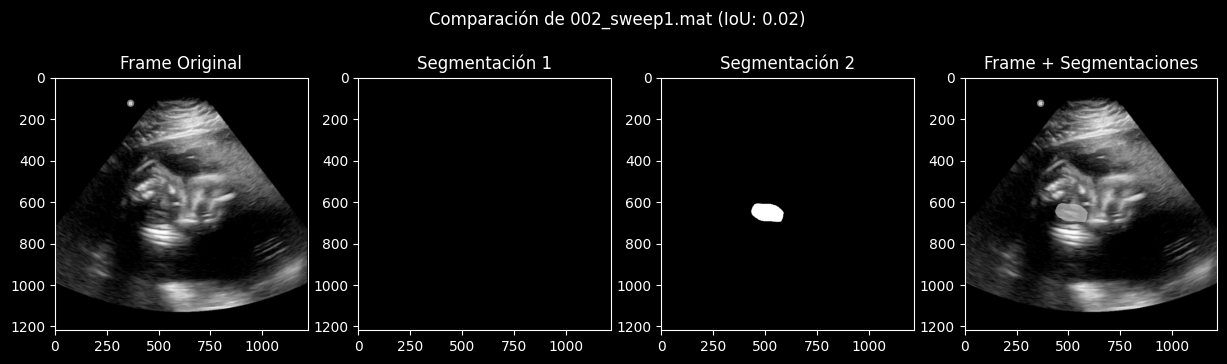

/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study/007/007_sweep1.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study/008/008_sweep1.mp4


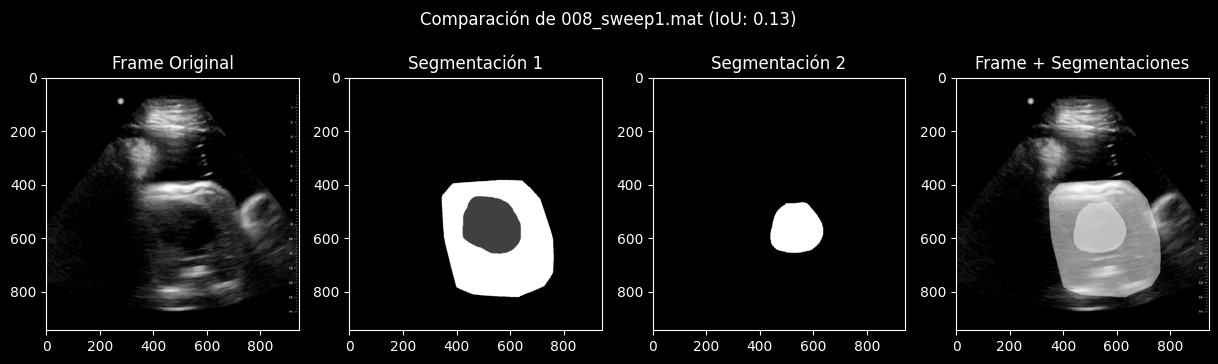

/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study/008/008_sweep7.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study/010/010_sweep2.mp4


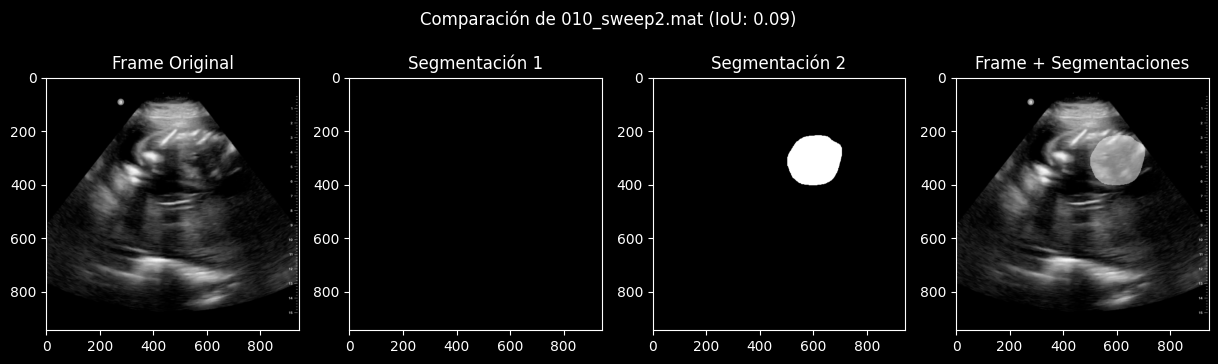


Total de archivos comparados: 6
Promedio de IoU entre segmentaciones después del recorte y padding: 0.05


In [77]:
import cv2
import scipy.io as sio
import numpy as np
import os
import matplotlib.pyplot as plt

# 📂 Rutas de los datasets y coordenadas de recorte
path1 = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/LabelDataObstetrics1"
path2 = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/LabelDataObstetrics"
crop_path = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/crop_coordinates"
video_path = "/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/Study"  # Ajusta la ruta de los videos

# 📄 Obtener lista de archivos en ambos datasets
files1 = {f: os.path.join(path1, f) for f in os.listdir(path1) if f.endswith(".mat")}
files2 = {f: os.path.join(path2, f) for f in os.listdir(path2) if f.endswith(".mat")}

# 🔍 Normalizar nombres para emparejar archivos (removiendo " copy" y " copy 2")
import re
def clean_filename(filename):
    return re.sub(r" copy( 2)?", "", filename)

normalized_files2 = {clean_filename(f): os.path.join(path2, f) for f in files2.keys()}

# 🔍 Encontrar archivos comunes
common_files = set(files1.keys()).intersection(set(normalized_files2.keys()))

# 📊 Comparar etiquetas de archivos comunes después del recorte y padding
ious = []

for filename in common_files:
    # Cargar segmentaciones
    data1 = sio.loadmat(files1[filename])
    data2 = sio.loadmat(normalized_files2[filename])
    mask1 = data1["labels"]
    mask2 = data2["labels"]

    # Obtener paciente y video
    patient_id = filename.split("_")[0]
    patient_id_name = filename.split(".")[0]
    video_file = os.path.join(video_path, patient_id, f"{patient_id_name}.mp4")
    print(video_file)
    
    if not os.path.exists(video_file):
        print(f"⚠️ No se encontró video para {filename}, se omite.")
        continue

    # Cargar coordenadas de recorte
    crop_file = os.path.join(crop_path, f"{patient_id}.mat")
    if not os.path.exists(crop_file):
        print(f"⚠️ No se encontró recorte para {filename}, se omite.")
        continue

    crop_data = sio.loadmat(crop_file)
    x1, x2 = crop_data["x1"][0][0] - 1, crop_data["x2"][0][0]
    y1, y2 = crop_data["y1"][0][0] - 1, crop_data["y2"][0][0]

    # Recortar las máscaras (ahora en 3D)
    mask1 = mask1[y1:y2, x1:x2, :]
    mask2 = mask2[y1:y2, x1:x2, :]

    # 🔹 Extraer todos los frames del video
    cap = cv2.VideoCapture(video_file)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    frames = np.array(frames)  # Convertir a numpy array


    # Convertir frames a escala de grises si es necesario
    if len(frames.shape) == 4:  # Si tiene canal de color (H, W, C)
        frames = np.mean(frames, axis=-1).astype(np.uint8)  # Convertir a escala de grises

    # Recortar frames
    frames = frames[:, y1:y2, x1:x2]


    # Verificar la consistencia temporal entre el video y las máscaras
    time_depth = min(mask1.shape[2], mask2.shape[2], frames.shape[0])
    mask1 = mask1[:, :, :time_depth]
    mask2 = mask2[:, :, :time_depth]
    frames = frames[:time_depth, :, :]
    #permute frames to height, width, time
    frames = np.moveaxis(frames, 0, 2)


    # 🔹 Aplicar Padding si hay diferencias en tamaño
    target_h = max(mask1.shape[0], mask2.shape[0], frames.shape[1])
    target_w = max(mask1.shape[1], mask2.shape[1], frames.shape[2])

    def pad_mask(mask, target_h, target_w):
        pad_h = target_h - mask.shape[0]
        pad_w = target_w - mask.shape[1]
        pad_top = max(0, int(pad_h // 2))
        pad_bottom = max(0, int(pad_h - pad_h // 2))
        pad_left = max(0, int(pad_w // 2))
        pad_right = max(0, int(pad_w - pad_w // 2))

        return np.pad(mask, ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0)), mode='constant')

    mask1 = pad_mask(mask1, target_h, target_w)
    mask2 = pad_mask(mask2, target_h, target_w)
    frames = pad_mask(frames, target_h, target_w)


    # Calcular IoU
    iou = np.sum(np.logical_and(mask1 > 0, mask2 > 0)) / np.sum(np.logical_or(mask1 > 0, mask2 > 0))
    ious.append(iou)

    # 🔹 Mostrar comparación visual con el frame original
    if len(ious) % 2 == 0:  # Visualizar cada 3 archivos
        #frame_idx = time_depth // 2  # Escoger un frame intermedio
        #frame idx is from non empty frames
        non_empty_frames1 = np.where(np.any(mask1 > 0, axis=(0, 1)))[0]
        non_empty_frames2 = np.where(np.any(mask2 > 0, axis=(0, 1)))[0]
        frame_idx1 = np.min(non_empty_frames1[0])
        frame_idx2=np.min(non_empty_frames2[0])
        if frame_idx1 < frame_idx2:
            frame_idx=frame_idx2

        # Verificar que overlay y máscaras tengan el mismo tamaño antes de aplicar
        if frames[:, :, frame_idx].shape == mask1[:, :, frame_idx].shape:
            overlay = frames[:, :, frame_idx].copy()

            overlay[mask1[:, :, frame_idx] > 0] = np.clip(
                overlay[mask1[:, :, frame_idx] > 0] * 0.5 + 255 * 0.5, 0, 255
            )
            overlay[mask2[:, :, frame_idx] > 0] = np.clip(
                overlay[mask2[:, :, frame_idx] > 0] * 0.5 + 255 * 0.5, 0, 255
            )

            plt.figure(figsize=(15, 4))
            plt.suptitle(f"Comparación de {filename} (IoU: {iou:.2f})")

            plt.subplot(1, 4, 1)
            plt.imshow(frames[:, :, frame_idx], cmap="gray")
            plt.title("Frame Original")

            plt.subplot(1, 4, 2)
            plt.imshow(mask1[:, :, frame_idx], cmap="gray")
            plt.title("Segmentación 1")

            plt.subplot(1, 4, 3)
            plt.imshow(mask2[:, :, frame_idx], cmap="gray")
            plt.title("Segmentación 2")

            plt.subplot(1, 4, 4)
            plt.imshow(overlay, cmap="gray")
            plt.title("Frame + Segmentaciones")

            plt.show()
        else:
            print(f"⚠️ Dimensiones incompatibles en {filename}: Frame {frames.shape[1:3]}, Mask {mask1[:, :, frame_idx].shape}")

# 📊 Mostrar estadísticas finales
print(f"\nTotal de archivos comparados: {len(ious)}")
print(f"Promedio de IoU entre segmentaciones después del recorte y padding: {np.mean(ious):.2f}")


Este codigo sirve par generar frames 2d


In [81]:

import cv2
import numpy as np
import scipy.io as sio
import skvideo.io as skv
import torchio as tio
from skimage.transform import resize
import os
import sys
import matplotlib.pyplot as plt
import skimage.morphology as morph

src_path = os.path.join(general_path, 'src')
sys.path.append(src_path)

#import overlay_video from src/utils/overlay_video.py assuming that the file is in the same directory
from utils.overlay_video import generate_overlay_video


for i in range(0,len(ob1_files)):
# for i in range(2,3):
    mp4_file_path = general_path+'./Study/'+patient_t[i]+'/'+sweep_t[i]+'.mp4'
    coordinates = sio.loadmat(general_path+'./crop_coordinates/'+patient_t[i]+'.mat')
    #substract 1 to coordinates to match python indexing
    x1 = coordinates['x1'][0][0]-1
    x2 = coordinates['x2'][0][0]
    y1 = coordinates['y1'][0][0]-1
    y2 = coordinates['y2'][0][0]

    width = x2-x1
    height = y2-y1

    ob = sio.loadmat(ob1_files[i])['labels']
    ob=np.moveaxis(ob, 2, 0)
    print(mp4_file_path)
    non_empty_frames = np.where(np.any(ob > 0, axis=(1, 2)))[0]
    #if non_empty_frames is empty, remove it pass the loop
    if non_empty_frames.size == 0:
        continue
    cap = cv2.VideoCapture(mp4_file_path)
    #join every frame as an array
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    gt_video = np.array(frames)

    # print(gt_video.shape)
    # print(ob.shape)
    # print('width: ',width)
    # print('height: ',height)
    diff = gt_video[1:,:,:,0]-gt_video[:-1,:,:,0]
    diff_sum=np.sum(diff,axis=(1,2))
    #normalize diff_sum
    diff_sum = diff_sum/np.max(diff_sum)

    # Assuming diff_sum is your normalized data array from the plot
    # Example: diff_sum = np.array([...])  # Replace with your actual array
    threshold = 0.2

    # Detect indices where diff_sum crosses above the threshold
    first_frame = np.where(diff_sum > threshold)[0][0]  # First upward crossing
    last_frame = np.where(diff_sum > threshold)[0][-1]  # Last upward crossing (before drop)

    #if from last_frame to the end is mask ob is not zero, last_frame is the last frame where mask is not zero
    for j in range(last_frame,diff.shape[0]):
        if np.sum(ob[j]) != 0:
            last_frame = j

    #if from start to first_frame is mask ob is not zero, first_frame is the first frame where mask is not zero
    #in this case the for is in reverse
    for j in range(first_frame,0,-1):
        if np.sum(ob[j]) != 0:
            first_frame = j


    # Obtener los límites del área de interés
    # row_limits, col_limits = np.where(morph.remove_small_objects(diff[first_frame+50].astype(bool), min_size=100) > 0)
    # y1, y2 = row_limits.min(), row_limits.max()
    # x1, x2 = col_limits.min(), col_limits.max()

    #check first if ob shape is the same as gt_video

    if ob.shape[1] != gt_video.shape[1] or ob.shape[2] != gt_video.shape[2]:
        #check width with ob.shape[2] and height with ob.shape[1]
        if width != ob.shape[2] or height != ob.shape[1]:
            # print('width and height are not the same')
            # print('width: ',width)
            # print('height: ',height)
            # print('gt: ', gt_video.shape)
            # print('ob: ',ob.shape)
            gt_video = gt_video[first_frame:last_frame, y1:y2, x1:x2, 0]
            ob = ob[first_frame:last_frame, :,:]
            #calculate padding or cropping for height (dim 1)
            pad_or_crop_h = (gt_video.shape[1] - ob.shape[1])
            pad_h_before = max(0, pad_or_crop_h // 2)
            pad_h_after = max(0, pad_or_crop_h - pad_h_before)
            crop_h_before = max(0, -pad_or_crop_h // 2)
            crop_h_after = max(0, -pad_or_crop_h - crop_h_before)

            #calculate padding or cropping for width (dim 2)
            pad_or_crop_w = (gt_video.shape[2] - ob.shape[2])
            pad_w_before = max(0, pad_or_crop_w // 2)
            pad_w_after = max(0, pad_or_crop_w - pad_w_before)
            crop_w_before = max(0, -pad_or_crop_w // 2)
            crop_w_after = max(0, -pad_or_crop_w - crop_w_before)

            #apply padding if needed
            if pad_h_before > 0 or pad_h_after > 0 or pad_w_before > 0 or pad_w_after > 0:
                ob = np.pad(ob, 
                                ((0, 0), 
                                (pad_h_before, pad_h_after), 
                                (pad_w_before, pad_w_after)), 
                                'constant')
                
            #apply cropping if needed
            if crop_h_before > 0 or crop_h_after > 0 or crop_w_before > 0 or crop_w_after > 0:
                ob = ob[:, crop_h_before:ob.shape[1] - crop_h_after, crop_w_before:ob.shape[2] - crop_w_after]
            

        else:
            # Recortar el área de interés
            gt_video = gt_video[first_frame:last_frame, y1:y2, x1:x2, 0]
            ob = ob[first_frame:last_frame, :,:]

    else:
        # Recortar el área de interés
        gt_video = gt_video[first_frame:last_frame, y1:y2, x1:x2, 0]
        ob = ob[first_frame:last_frame, y1:y2,x1:x2]
    non_empty_frames = np.where(np.any(ob > 0, axis=(1, 2)))[0]
    # Identificar rangos
    start_non_empty = non_empty_frames[0]
    end_non_empty = non_empty_frames[-1]

    # Samplear antes, durante y después
    before_frames = np.arange(0, start_non_empty, 14)
    during_frames = np.arange(start_non_empty, end_non_empty + 1, 5)
    after_frames = np.arange(end_non_empty + 1, len(gt_video), 14)

    # Concatenar y asegurar que no se pase del índice máximo
    sampled_frames = np.concatenate([before_frames, during_frames, after_frames])
    sampled_frames = sampled_frames[sampled_frames < len(gt_video)]

    # Aplicar el sampling al video
    gt_video = gt_video[sampled_frames]
    ob_sampled = ob[sampled_frames]

    #resize gt_video_sampled to 512x512
    gt_video=np.array([resize(frame, (512, 512), anti_aliasing=True) for frame in gt_video])*255
    #resize ob_sampled to 512x512, because it is a mask, use nearest interpolation
    ob=np.array([resize(frame, (512, 512), anti_aliasing=False, order=0) for frame in ob_sampled])
    #change dtype to uint8 for gt_video and ob
    #gt_video = gt_video.astype(np.uint8)
    ob = ob.astype(np.uint8)*255

    #save gt_video and ob_sampled frame by frame
    for j in range(len(gt_video)):
        cv2.imwrite(general_path+'data/512x512_maddie/gt/'+sweep_t[i]+'_'+str(j)+'.png', gt_video[j])
        cv2.imwrite(general_path+'data/512x512_maddie/label/'+sweep_t[i]+'_'+str(j)+'.png', ob[j])  
    # #np.save(general_path+'data/512x512_maddie/'+sweep_t[i]+'_gt.npy', resized_video_gt)
    #np.save(general_path+'data/512x512_maddie/'+sweep_t[i]+'_label.npy', resized_label.astype(np.uint8))
    print(i)

/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/002/002_sweep1.mp4
0
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/002/002_sweep4.mp4
1
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/002/002_sweep5.mp4
2
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/007/007_sweep1.mp4
3
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/008/008_sweep1.mp4
4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/008/008_sweep7.mp4
5
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/010/010_sweep2.mp4
6
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/025/025_sweep4.mp4
7
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/025/025_sweep5.mp4
8
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/030/030_sweep3.mp4
/Users/emilio/Library/

[ WARN:0@8956.075] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 31252.844755 ms
[ WARN:0@8956.075] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 31252.912005 ms
[ WARN:0@8956.075] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 31252.956839 ms
[ WARN:0@8956.075] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 31252.964797 ms
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x16cf322a0] moov atom not found


64
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/087/87_sweep6.mp4
65
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/087/87_sweep7.mp4
66
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/087/87_sweep8.mp4
67
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/092/092_sweep1.mp4
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/092/092_sweep6.mp4
69
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/094/094_sweep2.mp4
70
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/094/094_sweep3.mp4
71
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/094/094_sweep4.mp4
72
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/094/094_sweep6.mp4
73
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/094/094_sweep7.mp4
74
/Users/emilio

[ WARN:0@9302.699] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 30120.950584 ms
[ WARN:0@9302.699] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 30120.979876 ms
[ WARN:0@9302.699] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 30120.988960 ms
[ WARN:0@9302.699] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 30120.996335 ms
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1676c1070] moov atom not found


80
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/098/098_sweep7.mp4
81
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/100/100_sweep1.mp4
82
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/100/100_sweep4.mp4
83
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/100/100_sweep7.mp4
84
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/101/101_sweep3.mp4
85
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/101/101_sweep7.mp4
86
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/102/102_sweep2.mp4
87
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/102/102_sweep3.mp4
88
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/102/102_sweep7.mp4
89
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/105/105_sweep1.mp4
90
/Users/

[ WARN:0@9698.674] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 35820.606658 ms
[ WARN:0@9698.674] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 35820.670908 ms
[ WARN:0@9698.674] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 35820.684742 ms
[ WARN:0@9698.674] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 35820.693408 ms
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1678f8dd0] moov atom not found


96
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/107/107_sweep7.mp4
97
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/109/109_sweep4.mp4
98
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/110/110_sweep1.mp4
99
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/110/110_sweep3.mp4
100
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/110/110_sweep7.mp4
101
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/110/110_sweep8.mp4
102
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/113/113_01.mp4
103
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/113/113_03.mp4
104
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/113/113_06.mp4
105
/Users/emilio/Library/CloudStorage/Box-Box/GitHub/lightning-template/./Study/113/113_07.mp4
106
/Users/emilio/Li

In [6]:
import glob
import numpy as np
import cv2
#analyze path general_path+'data/512x512_maddie/label/
label_files = glob.glob(general_path+'data/512x512_maddie/label/*.png')

#open label_files and count if the number of pixels is zero or not
empty_frame=0
non_empty_frame=0

for i in range(len(label_files)):
    label = cv2.imread(label_files[i], cv2.IMREAD_GRAYSCALE)
    if np.sum(label) == 0:
        empty_frame+=1
    else:
        non_empty_frame+=1

print('empty frames: ',empty_frame)
print('non empty frames: ',non_empty_frame)

empty frames:  2856
non empty frames:  1062


In [95]:
import glob
import numpy as np
import cv2
#analyze path general_path+'data/512x512_maddie/label/
label_files = glob.glob(general_path+'data/512x512_marika/label/*.png')

#open label_files and count if the number of pixels is zero or not
empty_frame=0
non_empty_frame=0

for i in range(len(label_files)):
    label = cv2.imread(label_files[i], cv2.IMREAD_GRAYSCALE)
    if np.sum(label) == 0:
        empty_frame+=1
    else:
        non_empty_frame+=1

print('empty frames: ',empty_frame)
print('non empty frames: ',non_empty_frame)

empty frames:  3564
non empty frames:  1563
